#### Notes:

Find what types of wine users like (power wine)

Find attributes of power wine

Sales spike in December

    Find out which wines sell
    Find out which users buy
Sales dip in July

    Find out which wines sell
    Find out which users buy

## Noted from meeting with Brian
get a sense of scale, cleanliness of data

make user X item matrix wrt purchases
make user X item matrix wrt ratings 

In [1]:
reset -f -s

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import ftfy
import json
import operator
from collections import defaultdict, Counter
%matplotlib inline

In [3]:
def sort_dict_to_list(data_dict, sort_by):
    '''Input: dictionary
       Input: sort_by, if 1, then sort by value, if 2 sort by key
       Output: returns a sorted key and value list'''
    # sort dictionary by value --> .itemgetter(1)
    sorted_data = sorted(data_dict.items(), key=operator.itemgetter(sort_by), reverse=True)

    # move sorted dates and sorted date counts to lists
    k_datum = []
    v_count_datum = []
    for datum in sorted_data:
        k_datum.append(datum[0])
        v_count_datum.append(datum[1])
    return k_datum, v_count_datum

In [4]:
path3 = "/Users/Alexander/cap_stone_project_wine/data/Purchases.txt"
purchases = pd.read_csv(path3, sep = "\t")

In [5]:
purchases.head()

,CustomerHash,PurchaseHash,ProductKey,Date,Units
0,F1923160355C00D4D1E7801F74132540,C60D8C98A7328EF5A1F5090D6A29DB7F,222650,2015-06-18,1
1,D3BE5BC2AA8796FCD402023CD6E5A6AC,C9F6085954D5D36615EE0BA44BEB0A2A,95350,2009-08-04,1
2,00D7447BAB0443738F81C3660F478357,18B773B0D5568E406CBB946F628C1DC6,38706,2007-12-10,1
3,F3548BD72E0F97ECBDA95918DE2743AD,96FEEC28AB4F35342DE08987D39406FC,333116,2012-03-16,2
4,9A260E4A83A112AA06F06A11DBF98BBD,07879D41A42AD75F020E3DA70D698ACC,221136,2007-05-08,1


### Univariate Distributions

##### Customer Purchases

In [6]:
# get total purchases for each user
units = purchases.groupby(["CustomerHash"])["Units"].sum()

In [7]:
k = 12
print "users wtih {0} or less purchases is {1:.4} of the population".format(k,len(units[units <= k])/ len(units))
print "\n{:.4} of the population will be excluded from phase 1".format(len(units[units <= k])/ len(units))

users wtih 12 or less purchases is 0.802 of the population

0.802 of the population will be excluded from phase 1


In [8]:
data = [
    go.Histogram(
        x=units,
        marker=dict(
        color="#ce2c4b"
    ),
    )
]
layout = go.Layout(
title='Total Wine Purchases per user',

    yaxis=dict(
    title='Total Wine Purchases'
),
    xaxis=dict(
    title="Users"
)
)    
fig = go.Figure(data=data, layout=layout)
plot_url_purchases = py.iplot(fig, filename='style-bar')

//anaconda/lib/python2.7/site-packages/plotly/plotly/plotly.py:236: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [9]:
# univariate
# user segmentation is based off of this distribution
plot_url_purchases

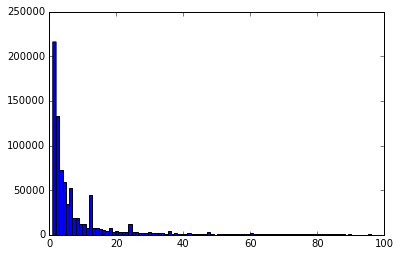

In [10]:
_ = plt.hist(units[units < 100], bins=100)

###Date

In [11]:
date_count = Counter(purchases.Date.values)

In [12]:
sort_by_key = 0
date, date_count = sort_dict_to_list(date_count,sort_by_key)

In [13]:
data = [
    go.Scatter(
        x=date,
        y=date_count,
        marker=dict(
        color="#ce2c4b"
    ),
    )
]

layout = go.Layout(
title='Frequency of Wine Purchases by Date',

    yaxis=dict(
    title='Frequency of Wine Purchases'
),
    xaxis=dict(
    title="Date"
)
)   
fig = go.Figure(data=data, layout=layout)
plot_url_date = py.iplot(fig, filename='date-axes')

In [14]:
# univariate
# each purchases consist of 1 or more bottles of wine
plot_url_date

###Identify Users who have purchased a total of k bottles of wine

    segment users between anomoly spikes 
    1 - 6 purchase should all be seperate groups 
    7 - 12 purcahse should all be one group
    12 should be its own group because it's an anomoly 
    13 - 24 purchases should all be one group 
    25 should its own group because it's also an anomoly
    26 - 100 is it's own group
    100 + is its own group 
    power users are the anomolous groups

In [15]:
#  1 - 6 purchase should all be seperate groups 
one_purchase    = units[units == 1].index.tolist()
two_purchases   = units[units == 2].index.tolist()
three_purchases = units[units == 3].index.tolist()
four_purchases  = units[units == 4].index.tolist()
five_purchases  = units[units == 5].index.tolist()
six_purchases   = units[units == 6].index.tolist()

In [16]:
# 7 - 11 purcahse should all be one group
seven_eleven_purchases = []
for i in xrange(7, 12):
    seven_eleven_purchases =  units[units == i].index.tolist() +  seven_eleven_purchases

In [17]:
# 12 should be its own group because it's an anomoly 
twelve_purchase = units[units == 12].index.tolist()

In [18]:
# 13 - 24 purchases should all be one group 
thirteen_twentyfour_purchases = []
for i in xrange(13, 25):
    thirteen_twentyfour_purchases =  units[units == i].tolist() +  thirteen_twentyfour_purchases

In [19]:
# 25 should its own group because it's also an anomoly
twentyfive_purchases = units[units == 25].index.tolist()

In [20]:
# 26 - 100 is it's own group
twentysix_onehundred_purchases = []
for i in xrange(26, 101):
    twentysix_onehundred_purchases =  units[units == i].index.tolist() +  twentysix_onehundred_purchases

In [21]:
# 100 + is its own group
onehundred_plus = units[units > 100].index.tolist()

####Move all files into single dictionary

In [22]:
data_dict = {"one_purchase":one_purchase,
            "two_purchases": two_purchases,
            "three_purchases":three_purchases,
            "four_purchases":four_purchases,
            "five_purchase":five_purchases,
            "six_purchase": six_purchases,
            "seven_eleven_purchases":seven_eleven_purchases,
            "twelve_purchase": twelve_purchase,
            "thirteen_twentyfour_purchases": thirteen_twentyfour_purchases,
            "twentyfive_purchases":twentyfive_purchases,
            "twentysix_onehundred_purchases":twentysix_onehundred_purchases,
            "onehundred_plus":onehundred_plus}

In [23]:
data = json.dumps(data_dict)

####Save user segmentation to files

In [24]:
# # Only needs to be ran once !
# user_path = "/Users/Alexander/cap_stone_project_wine/data/user_segmentation"
# np.save(user_path, data)

###Bivariate Distributions

In [25]:
purchases.head()

,CustomerHash,PurchaseHash,ProductKey,Date,Units
0,F1923160355C00D4D1E7801F74132540,C60D8C98A7328EF5A1F5090D6A29DB7F,222650,2015-06-18,1
1,D3BE5BC2AA8796FCD402023CD6E5A6AC,C9F6085954D5D36615EE0BA44BEB0A2A,95350,2009-08-04,1
2,00D7447BAB0443738F81C3660F478357,18B773B0D5568E406CBB946F628C1DC6,38706,2007-12-10,1
3,F3548BD72E0F97ECBDA95918DE2743AD,96FEEC28AB4F35342DE08987D39406FC,333116,2012-03-16,2
4,9A260E4A83A112AA06F06A11DBF98BBD,07879D41A42AD75F020E3DA70D698ACC,221136,2007-05-08,1


####Which wines are being purchased around the 2014 Chrismas Spikes?

In [26]:
chris_spike = purchases[(purchases.Date >= "2014-12-01") & (purchases.Date <= "2014-12-31")]

In [27]:
# get total purchases on distinct bottles of wine
chris_products = chris_spike.groupby(["ProductKey"])["Units"].sum()

In [28]:
chris_products.sort()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting



In [29]:
data = [
    go.Histogram(
        x=chris_products.values[chris_products.values < 50],
        marker=dict(
        color="#ce2c4b"
    ),
    )
]
layout = go.Layout(
title='Distinct Wines vs 2014 December Purchases',

    yaxis=dict(
    title='Distinct Wine'
),
    xaxis=dict(
    title="December Purchases"
)
)    
fig = go.Figure(data=data, layout=layout)
plot_url_chirs_products = py.iplot(fig, filename='style-bar')

In [30]:
plot_url_chirs_products

The dist shows anomalous behavior with purchase 12 of 600 distinct wines

    Save wines that were purchased 1,2,3 and 12 times 

In [31]:
dec_2014_purchase_1 = chris_products[chris_products == 1]
dec_2014_purchase_2 = chris_products[chris_products == 2]
dec_2014_purchase_3 = chris_products[chris_products == 3]
dec_2014_purchase_12 = chris_products[chris_products == 12]

####Which wines are being purchased around the 2013 Chrismas Spikes?

In [32]:
christ_spike_2013 = purchases[(purchases.Date >= "2013-12-01") & (purchases.Date <= "2013-12-31")]

In [33]:
# get total purchases on distinct bottles of wine
christ_spike_2013 = christ_spike_2013.groupby(["ProductKey"])["Units"].sum()

In [34]:
christ_spike_2013.sort()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting



In [35]:
data = [
    go.Histogram(
        x=christ_spike_2013.values[christ_spike_2013.values < 50],
        marker=dict(
        color="#ce2c4b"
    ),
    )
]
layout = go.Layout(
title='Distinct Wines vs 2013 December Purchases',

    yaxis=dict(
    title='Distinct Wine'
),
    xaxis=dict(
    title="December Purchases"
)
)    
fig = go.Figure(data=data, layout=layout)
plot_url_chirst_2013 = py.iplot(fig, filename='style-bar')

In [36]:
plot_url_chirst_2013

The dist shows anomalous behavior with purchase 12 of 600 distinct wines

    Save wines that were purchased 1,2,3 and 12 times 

In [37]:
dec_2013_purchase_1 = christ_spike_2013[christ_spike_2013 == 1]
dec_2013_purchase_2 = christ_spike_2013[christ_spike_2013 == 2]
dec_2013_purchase_3 = christ_spike_2013[christ_spike_2013 == 3]
dec_2013_purchase_12 = christ_spike_2013[christ_spike_2013 == 12]

####Which wines are purchases during the 2015 July Dip?

In [38]:
july_dip_2015 = purchases[(purchases.Date >= "2015-07-01") & (purchases.Date <= "2015-07-31")]

In [39]:
# get total purchases on distinct bottles of wine
july_dip_2015 = july_dip_2015.groupby(["ProductKey"])["Units"].sum()

In [40]:
data = [
    go.Histogram(
        x=july_dip_2015.values[july_dip_2015.values < 50],
        marker=dict(
        color="#ce2c4b"
    ),
    )
]
layout = go.Layout(
title='Distinct Wines vs 2015 July Purchases',

    yaxis=dict(
    title='Distinct Wine'
),
    xaxis=dict(
    title="July Purchases"
)
)    
fig = go.Figure(data=data, layout=layout)
plot_url_july_2015 = py.iplot(fig, filename='style-bar')

In [41]:
plot_url_july_2015

This dist shows anomalous behavior at 6 and 12 purchases 
    
    Save wines that were purchased 1,2,6 and 12 times

In [42]:
july_2015_purchase_1 = july_dip_2015[july_dip_2015 == 1]
july_2015_purchase_2 = july_dip_2015[july_dip_2015 == 2]
july_2015_purchase_6 = july_dip_2015[july_dip_2015 == 6]
july_2015_purchase_12 = july_dip_2015[july_dip_2015 == 12]

####Which wines are purchases during the 2014 July Dip?

In [43]:
july_dip_2014 = purchases[(purchases.Date >= "2014-07-01") & (purchases.Date <= "2014-07-31")]

In [44]:
# get total purchases on distinct bottles of wine
july_dip_2014 = july_dip_2014.groupby(["ProductKey"])["Units"].sum()

In [45]:
data = [
    go.Histogram(
        x=july_dip_2014.values[july_dip_2014.values < 50],
        marker=dict(
        color="#ce2c4b"
    ),
    )
]
layout = go.Layout(
title='Distinct Wines vs 2014 July Purchases',

    yaxis=dict(
    title='Distinct Wine'
),
    xaxis=dict(
    title="July Purchases"
)
)    
fig = go.Figure(data=data, layout=layout)
plot_url_july_2014 = py.iplot(fig, filename='style-bar')

In [46]:
plot_url_july_2014

This dist shows anomalous behavior at 6 and 12 purchases
    
    Save wines that were purchased 1,2,6 and 12 times

In [47]:
july_2014_purchase_1 = july_dip_2014[july_dip_2014 == 1]
july_2014_purchase_2 = july_dip_2014[july_dip_2014 == 2]
july_2014_purchase_6 = july_dip_2014[july_dip_2014 == 6]
july_2014_purchase_12 = july_dip_2014[july_dip_2014 == 12]